In [1]:
import pandas as pd
import numpy as np
import os
import sys
import Mixture
import multiprocessing

#Library to read RDS format
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

/home/jcva/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/home/jcva/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
print('Num cores: ' + str(multiprocessing.cpu_count()))

cores = 4
iters = 1000
output = 'outputBetas'

if cores > multiprocessing.cpu_count():
    cores = multiprocessing.cpu_count()

Num cores: 24


In [3]:
# Read RDS file
readRDS = robjects.r['readRDS']
dfEpic = readRDS('./EPICsig.betas.noise.list.rds')

In [5]:
# Read RDS file
readRDS = robjects.r['readRDS']
dfTil10 = readRDS('data/TIL10.betas.noise.list.rds')

In [7]:
# Read RDS file
readRDS = robjects.r['readRDS']
dfLm22 = readRDS('data/LM22.noise.quanTIseq.RDS')

In [ ]:
dfTil9 = pd.read_excel('data/betas.list.TIL9.xlsx')

In [15]:
subject = dfEpic

# Getting expression matrix
vector = [x[2] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
YEpic = pd.DataFrame(np.column_stack(vector), columns=columns)
YEpic.insert(0, 'Gene symbol', subject[0][2].rownames)

In [16]:
subject = dfTil10

# Getting expression matrix
vector = [x[2] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
YTil10 = pd.DataFrame(np.column_stack(vector), columns=columns)
YTil10.insert(0, 'Gene symbol', subject[0][2].rownames)

In [ ]:
subject = dfLm22

# Getting expression matrix
vector = [x[2] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
YLm22 = pd.DataFrame(np.column_stack(vector), columns=columns)
YLm22.insert(0, 'Gene symbol', subject[0][2].rownames)

In [48]:
YEpic

,Gene symbol,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
0,PAX5,33.835016,33.439063,0.107934,15.069766,0.103147,0.342284,10.165779,14.429687,8.236283,...,0.001707,61.510096,17.000560,60.507699,1.547774,23.252330,0.296502,6.422237,89.164212,727.771254
1,MS4A1,5.361341,536.513455,8.161174,207.222330,13.448099,5.914344,32.803250,191.990629,16.380918,...,0.218313,101.264948,234.499374,814.730919,5.718310,317.169436,11.652310,318.356983,163.592664,472.148061
2,BANK1,0.119409,260.393465,1.529612,69.416779,120.441355,3.736596,1.559674,65.317712,2.029579,...,5.572059,5.540971,81.166864,261.899707,5.261101,108.827991,1.021766,126.242522,129.124258,132.981548
3,CD79A,6.838558,543.170714,8.995215,224.317559,8.606205,4.951527,5.539048,276.309626,5.368338,...,6.238025,324.174030,277.364764,1687.053565,42.039104,350.546160,25.347353,47.090340,182.784068,455.351327
4,FCRL2,0.107859,40.060217,0.172035,16.224099,30.916345,0.109282,0.344339,15.099121,0.288802,...,292.244503,0.058136,18.442179,68.362150,0.036631,25.233378,1.741050,15.966569,15.552388,33.661519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,CD28,57.018835,12.835943,84.147858,12.487873,90.655110,36.978912,27.128693,27.690630,33.900382,...,1.077002,5.029605,34.114903,41.760959,182.114565,23.385388,56.817092,7.873983,11.227581,33.571397
94,ITK,73.347149,0.016545,108.272663,0.022406,96.752080,42.053148,55.386926,160.748314,74.423344,...,0.893333,16.858038,59.388929,76.160148,13.820578,42.886581,117.915764,13.784104,0.047601,42.555502
95,BCL11B,23.090245,1.864365,37.534184,0.010680,67.066713,12.408108,15.156059,7.816509,8.565254,...,159.526636,385.771497,10.484640,17.155965,3.981450,8.512271,21.752832,50.836751,0.009408,12.078092
96,CD5,100.893150,0.657338,132.216988,0.830741,104.646703,57.058164,27.544343,22.515887,63.203203,...,0.000000,3.177235,50.425534,62.990629,0.297029,20.116653,84.230013,0.430416,96.416052,47.644134


In [47]:
YTil10

,Gene symbol,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
0,ABCB4,1.696405,14.601177,64.211202,12.885425,26.059485,17.183692,1.489173,1.421734,12.669053,...,74.062370,9.758805,4.121828,6.873452,5.057929,1.917839,95.447484,1.008446,0.323248,1.856583
1,ADAM28,5.459538,20.661578,43.290657,81.854262,13.477148,3.450750,2.272741,199.155106,51.489868,...,42.535402,90.985226,37.417103,46.915054,326.507956,43.998170,10.250866,8.816896,1.868406,95.490778
2,ADAM6,0.222388,110.470806,412.228543,337.926426,0.875044,0.360897,0.371379,0.330968,113.580958,...,77.853512,151.482681,40.456934,94.818904,141.885493,0.335921,0.619602,5.811499,0.363428,0.847782
3,AFF3,9.412224,11.215661,38.120708,42.675818,9.431858,2.405239,3.320203,7.909707,109.815128,...,655.718420,57.989885,204.247293,24.788341,15.939262,44.884420,5.773270,5.973441,2.346636,9.725091
4,AKAP2,15.308117,12.364849,89.903878,51.219630,3.356882,212.270475,9.091532,33.390168,34.485565,...,28.664970,45.742619,27.328516,34.587904,133.246870,6.472013,3.887833,78.642855,19.314551,11.587204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,KDM1B,54.794980,44.114777,108.586976,26.448207,66.060664,26.865345,23.146454,26.415735,20.279373,...,36.783052,9.901817,34.787231,27.522165,28.812815,156.384788,70.274379,51.777376,15.049917,67.720451
166,LMO2,114.735465,76.628363,76.380350,43.237040,115.159955,52.376365,31.681233,39.525920,29.851324,...,63.564970,17.080577,61.291932,37.879621,33.808590,191.295913,119.276620,114.294522,2.055177,114.440330
167,RNF144B,34.706696,51.055641,30.912885,27.264335,63.891393,21.685795,18.205524,31.613949,139.413265,...,38.176241,5.962471,25.646405,13.383567,30.085390,95.483603,256.287718,369.364178,48.439606,62.659622
168,SLC2A6,59.111312,115.376881,53.979337,103.302303,115.688329,410.312228,208.453965,63.933831,73.209957,...,62.647459,29.731974,35.817596,51.203961,27.794610,177.092084,100.251976,82.138063,7.431968,121.190751


In [43]:
df1 = robjects.pandas2ri.rpy2py_dataframe(dfLm22)

In [46]:
df1.T

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
Sample,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
B.cells.naive,0,0.296955,0.00281724,0,0,0.0337128,0,0.205592,0,0,...,0.0163553,0,0,0.0670377,0,0.157895,0,0.251286,0.129466,0
B.cells.memory,0,0.0743109,0,0,0,0,0,0,0,0,...,0.0796473,0,0,0,0,0,0,0.0793941,0,0
Plasma.cells,0,0,0,0,0.364891,0,0.00909763,0,0.406555,0,...,0.0734589,0.0891872,0,0,0,0.0606386,0,0,0,0
T.cells.CD8,0,0,0,0,0,0.39273,0.25018,0.0104815,0,0,...,0.0487106,0,0,0.0256928,0.125532,0,0,0.0346428,0,0
T.cells.CD4.naive,0.420872,0,0.0100702,0.130551,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T.cells.CD4.memory.resting,0,0,0,0,0,0,0,0.0344104,0,0,...,0.0145404,0,0,0,0,0,0,0,0,0
T.cells.CD4.memory.activated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T.cells.follicular.helper,0.15987,0,0.260103,0,0,0.173511,0.0287126,0,0,0.135868,...,0.0803493,0.0428791,0.187726,0,0,0,0,0.000301733,0,0
T.cells.regulatory..Tregs.,0.419258,0.283899,0.172434,0,0,0,0.15557,0.12043,0,0.0547074,...,0,0,0.271389,0,0.0789655,0,0.50004,0.239647,0,0


In [26]:
dfLm22.set_index('Sample')

AttributeError: 'DataFrame' object has no attribute 'set_index'

In [ ]:
dfTil9 = dfTil9.iloc[:, 1:]

In [11]:
# Getting Real Betas Matrix
vector = [x[0] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
Betas = pd.DataFrame(np.column_stack(vector), columns=columns)

In [12]:
Betas

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
0,0.000000,0.303727,0.000000,0.144961,0.000000,0.000000,0.000000,0.132821,0.000000,0.00000,...,0.000000,0.000000,0.163322,0.581540,0.000000,0.222777,0.000000,0.000000,0.118121,0.288724
1,0.000000,0.248805,0.000000,0.000000,0.000000,0.190631,0.183719,0.000000,0.000000,0.00000,...,0.262258,0.254058,0.152464,0.000000,0.443292,0.000000,0.000000,0.143478,0.000000,0.096959
2,0.462611,0.000000,0.607798,0.000000,0.481790,0.220031,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.187608,0.000000,0.000000,0.220309,0.000000,0.000000,0.215857
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281405,0.230731,0.253421,0.57704,...,0.000000,0.000000,0.267469,0.230851,0.000000,0.210095,0.293814,0.000000,0.000000,0.000000
4,0.537389,0.176673,0.000000,0.357447,0.000000,0.151945,0.366275,0.262128,0.207042,0.42296,...,0.737742,0.259467,0.136869,0.000000,0.306593,0.567128,0.224102,0.303188,0.443536,0.000000
5,0.000000,0.270794,0.392202,0.497592,0.149782,0.307906,0.168601,0.374320,0.539538,0.00000,...,0.000000,0.189638,0.279876,0.000000,0.000000,0.000000,0.261775,0.306653,0.438343,0.275779
6,0.000000,0.000000,0.000000,0.000000,0.368428,0.129487,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.296837,0.000000,0.000000,0.250115,0.000000,0.000000,0.246681,0.000000,0.122680


In [13]:
result_score = pd.read_excel('Result_Score_betas.xlsx')

In [29]:
result_mixture = pd.read_excel('Result_Mixture_betas.xlsx')

In [30]:
result_mixture.columns = ['Gene symbol', 'Bcells', 'CAFs', 'CD4_Tcells', 'CD8_Tcells',
       'Endothelial', 'Macrophages', 'NKcells']

In [16]:
result_score.columns = ['Gene symbol', 'Bcells', 'CAFs', 'CD4_Tcells', 'CD8_Tcells',
       'Endothelial', 'Macrophages', 'NKcells']

In [17]:
def blandAltman (betas, result):
    betahat = result
    betahat = betahat.flatten()
    
    betasim = betas.to_numpy(copy=True)
    betasim = betasim.flatten()
    
    df = pd.DataFrame(np.transpose([betahat, betasim, (betahat - betasim)]), columns = ['betahat', 'betasim', 'difs'])
    summary = pd.DataFrame([[np.mean(df.difs),np.std(df.difs),np.min(df.difs),np.max(df.difs)]], columns = ['mn', 'sd', 'mi', 'mx'])
    return df, summary

In [31]:
result_mixture

,Gene symbol,Bcells,CAFs,CD4_Tcells,CD8_Tcells,Endothelial,Macrophages,NKcells
0,V1,0.000000,0.000000,0.840096,0.000000,1.493341,0.000000,0.000000
1,V2,0.478298,0.390592,0.000000,0.000000,0.139507,0.421346,0.000000
2,V3,0.000000,0.000000,0.370152,0.000000,0.000000,0.238397,0.000000
3,V4,0.135470,0.000000,0.054360,0.000000,0.856461,1.154413,0.000000
4,V5,0.000000,0.000000,0.515377,0.000000,0.000000,0.233415,0.584202
...,...,...,...,...,...,...,...,...
995,V996,0.489637,0.000000,0.081964,0.215941,1.287745,0.000000,0.000000
996,V997,0.000000,0.000000,0.446903,0.607967,0.458792,0.529664,0.000000
997,V998,0.055978,0.254358,0.000000,0.000000,0.461090,0.557673,0.450287
998,V999,0.086505,0.000000,0.000000,0.000000,0.356277,0.322085,0.000000


In [27]:
result_score

,Gene symbol,Bcells,CAFs,CD4_Tcells,CD8_Tcells,Endothelial,Macrophages,NKcells
0,V1,0.000000,0.000000,1.620303,0.103999,2.015037,0.000866,0.000544
1,V2,0.551795,0.390629,0.008277,0.000000,0.277402,0.425068,0.000000
2,V3,0.000000,0.000395,0.378220,0.000000,0.000000,0.238564,0.000000
3,V4,0.349737,0.000178,0.036869,0.002921,0.865409,1.201853,0.001229
4,V5,0.000000,0.000000,0.758583,0.000000,0.012245,0.236603,0.586913
...,...,...,...,...,...,...,...,...
995,V996,0.781294,0.000000,0.042853,0.679996,1.975027,0.000000,0.000000
996,V997,0.005092,0.000000,0.453607,0.604957,0.480141,0.536239,0.000000
997,V998,0.055246,0.265042,0.000000,0.013136,0.561960,0.569781,0.459009
998,V999,0.086314,0.000065,0.000000,0.000000,0.360084,0.322150,0.000038


In [32]:
ba, summary = blandAltman (Betas, result_score.iloc[:, 1:].to_numpy())
ba2, summary2 = blandAltman (Betas, result_mixture.iloc[:, 1:].to_numpy())

In [33]:
import matplotlib.pyplot as plt

In [34]:
def blandAltamGraph(ba, summary):
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(ba.betasim, ba.difs, 'k.')
    plt.xlabel('Beta Sim')
    plt.ylabel('Difs')
    ax.axhline(summary.mn[0])
    ax.axhline(summary.mn[0]+2*summary.sd[0])
    ax.axhline(summary.mn[0]-2*summary.sd[0])

### SCORE

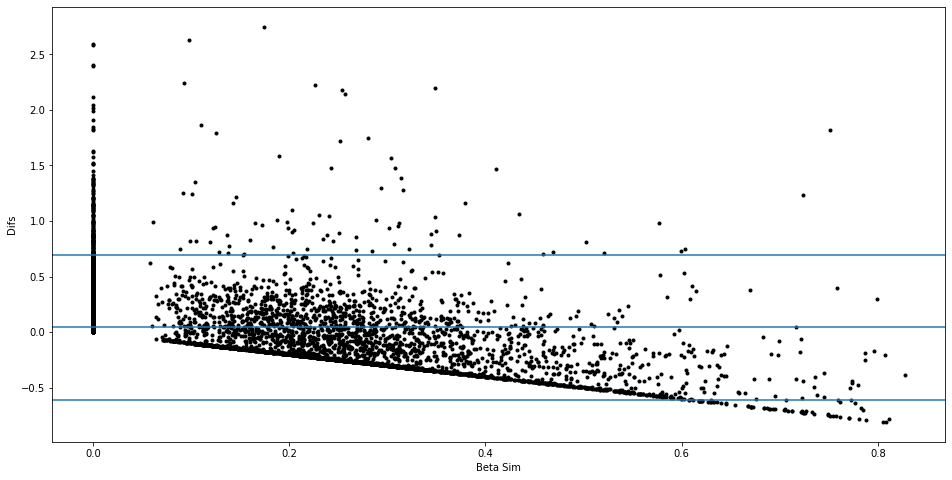

In [40]:
blandAltamGraph(ba, summary)

### MIXTURE

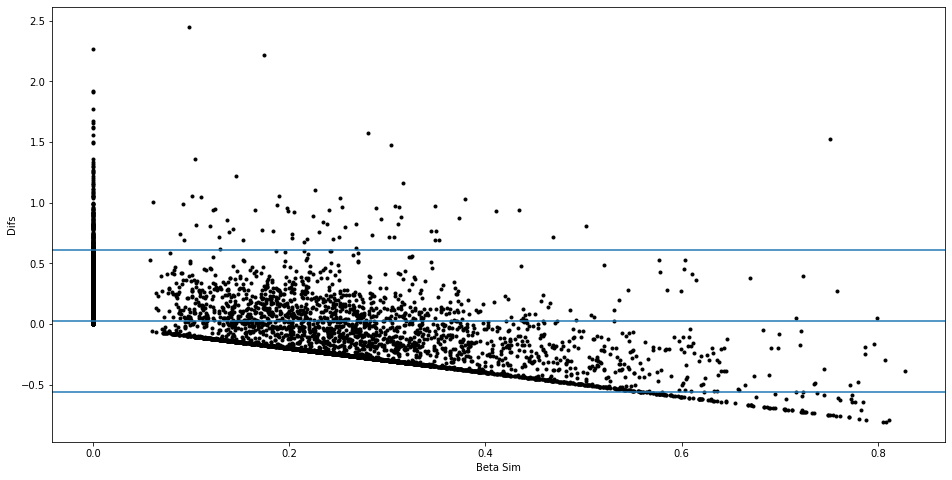

In [41]:
blandAltamGraph(ba2, summary2)